**Problem 1**
You as the part of project have to explore, analyze and treat the data for the below mentioned

1)  number of columns in each dataset
2)  duplicate rows in each dataset
3)  datatypes of columns
4)  features with missing values
5)  number of non-null unique values for features in each dataset
6)  what those unique values are and counts for each



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [3]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive', force_remount=True)


# Load Excel files
df1 = pd.read_excel('/content/drive/MyDrive/capstone project infosys/all_alpha_08.xlsx' )
df2 = pd.read_excel('/content/drive/MyDrive/capstone project infosys/all_alpha_09.xls')
df3 = pd.read_excel('/content/drive/MyDrive/capstone project infosys/all_alpha_10.xls')
df4 = pd.read_excel('/content/drive/MyDrive/capstone project infosys/all_alpha_11.xlsx')
df5 = pd.read_excel('/content/drive/MyDrive/capstone project infosys/all_alpha_12.xlsx')
df6 = pd.read_excel('/content/drive/MyDrive/capstone project infosys/all_alpha_13.xlsx')
df7 = pd.read_excel('/content/drive/MyDrive/capstone project infosys/all_alpha_14.xlsx')
df8 = pd.read_excel('/content/drive/MyDrive/capstone project infosys/all_alpha_15.xlsx')
df9 = pd.read_excel('/content/drive/MyDrive/capstone project infosys/all_alpha_16.xlsx')
df10 = pd.read_excel('/content/drive/MyDrive/capstone project infosys/all_alpha_17.xlsx')
df11= pd.read_excel('/content/drive/MyDrive/capstone project infosys/all_alpha_18.xlsx')
combined_df = pd.concat([df1, df2, df3,df4,df5,df6,df7,df8,df9,df10,df11], axis=0)
combined_df = pd.concat([df1, df2, df3,df4,df5,df6,df7,df8,df9,df10,df11], axis=1)
# Save to Excel
combined_df.to_excel('/content/Newdata.xlsx', index=False)

# Save to CSV
combined_df.to_csv('/content/Newdata.csv', index=False)











Mounted at /content/drive


In [4]:

df = pd.read_csv('/content/Newdata.csv')
df.head()





,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,...,Stnd Description.9,Underhood ID.10,Veh Class.10,Air Pollution Score.10,City MPG.10,Hwy MPG.10,Cmb MPG.10,Greenhouse Gas Score.10,SmartWay.10,Comb CO2.5
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,...,California LEV-III ULEV125,JHNXV02.4NH3,small car,3,25,35,29,6,No,309
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,...,Federal Tier 3 Bin 125,JHNXV02.4NH3,small car,3,25,35,29,6,No,309
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,...,California LEV-III ULEV125,JHNXV03.08H3,small SUV,3,26,27,27,6,No,330
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,...,Federal Tier 3 Bin 125,JHNXV03.08H3,small SUV,3,26,27,27,6,No,330
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,...,California LEV-III ULEV125,JHNXV03.5RH3,small SUV,3,19,27,22,4,No,404


In [14]:
## [1]to show the total no. of columns in each data set in the combined data set(Newdata)

unique_columns = df.columns.unique()
print(unique_columns)

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd',
       'Underhood ID', 'Veh Class',
       ...
       'Stnd Description.9', 'Underhood ID.10', 'Veh Class.10',
       'Air Pollution Score.10', 'City MPG.10', 'Hwy MPG.10', 'Cmb MPG.10',
       'Greenhouse Gas Score.10', 'SmartWay.10', 'Comb CO2.5'],
      dtype='object', length=194)


In [18]:
## [2]duplicate rows in each dataset

duplicates_df = df[df.duplicated()]
num_duplicates_df = duplicates_df.shape[0]
print(f"Number of duplicate rows in the dataset: {num_duplicates_df}")

Number of duplicate rows in the dataset: 0


In [19]:
## [3]datatypes of columns

data_typescol = df.dtypes[unique_columns]
print("Data types of unique columns:")
print(data_typescol)

Data types of unique columns:
Model                       object
Displ                      float64
Cyl                         object
Trans                       object
Drive                       object
                            ...   
Hwy MPG.10                  object
Cmb MPG.10                  object
Greenhouse Gas Score.10      int64
SmartWay.10                 object
Comb CO2.5                  object
Length: 194, dtype: object


In [20]:
## [4]features with missing values

missing_values = df.isnull().sum()

# Filtering out columns with no missing values
missing_values = missing_values[missing_values > 0]
print("Features with missing values:")
print(missing_values)

Features with missing values:
Model                     309
Displ                     309
Cyl                       508
Trans                     508
Drive                     402
                         ... 
Greenhouse Gas Score.9    124
SmartWay.9                124
Comb CO2.4                124
Displ.10                   50
Cyl.10                     50
Length: 178, dtype: int64


In [21]:
##[5]number of non-null unique values for features in each dataset



# Function to count non-null unique values for each column in a the DataFrame df
def count_nonnull(df):
    non_nullcounts = df.apply(lambda x: x.dropna().nunique())
    return non_nullcounts

# Count non-null unique values for the dataset
non_nullcounts_df = count_nonnull(df)

print("Number of non-null unique values in the dataset:")
print(non_nullcounts_df)

Number of non-null unique values in the dataset:
Model                      436
Displ                       47
Cyl                          8
Trans                       14
Drive                        2
                          ... 
Hwy MPG.10                 119
Cmb MPG.10                 110
Greenhouse Gas Score.10     10
SmartWay.10                  3
Comb CO2.5                 404
Length: 194, dtype: int64


In [23]:
##[6]what those unique values are and counts for each


# Function to count unique values and their occurrences for each column in DataFrame df
def unique_values_counts(df):
    unique_counts_dict = {}
    for column in df.columns:
        unique_counts_dict[column] = df[column].value_counts(dropna=True)
    return unique_counts_dict

unique_counts_df = unique_values_counts(df)

def display_unique_counts(unique_counts_dict, dataset_name):
    print(f"Unique values and their counts in {dataset_name}:")
    for column, counts in unique_counts_dict.items():
        print(f"\nColumn: {column}")
        print(counts)

display_unique_counts(unique_counts_df, "the first dataset")

Unique values and their counts in the first dataset:

Column: Model
Model
GMC Sierra 15                     25
FORD Ranger                       24
FORD F350                         22
HONDA Accord                      22
DODGE RAM 1500                    21
                                  ..
MERCEDES-BENZ C350                 1
MERCEDES-BENZ E320 Bluetec         1
MERCEDES-BENZ CLS550               1
MERCEDES-BENZ CLK350               1
MERCEDES-BENZ CLK350 Cabriolet     1
Name: count, Length: 436, dtype: int64

Column: Displ
Displ
3.5    194
2.4    184
2.5    171
3.0    158
2.0    132
3.6    110
5.3    108
6.0    103
3.7     86
5.4     81
4.0     80
4.6     80
4.8     74
2.3     71
2.7     68
3.8     62
5.7     59
4.2     57
4.7     45
6.2     41
1.8     36
3.2     34
5.5     30
2.2     30
5.0     29
1.6     24
2.9     24
3.3     24
4.3     22
5.6     20
3.1     18
4.4     16
3.4     16
6.7     14
6.8     13
1.5     12
2.8     12
5.9     12
6.1     12
6.5     10
3.9      8
1.3     

# New Section

**Problem 2**
Draw conclusions by creating visuals to communicate the unique models which are using different types of fuel alternatives.


Unique models throughout the dataset (excluding NaN values):
['ACURA MDX' 'ACURA RDX' 'ACURA RL' ... 'VOLVO V90' 'VOLVO XC60'
 'VOLVO XC90']
Unique fuel throughout the dataset (excluding NaN values):
['Gasoline' 'ethanol/gas' 'ethanol' 'diesel' 'CNG' 'Ethanol/Gas' 'Diesel'
 'Ethanol' 'Hydrogen' 'Electricity' 'Electricity/Gasoline'
 'Gasoline/Electricity' 'CNG/Gasoline' 'Gasoline/Electricty']


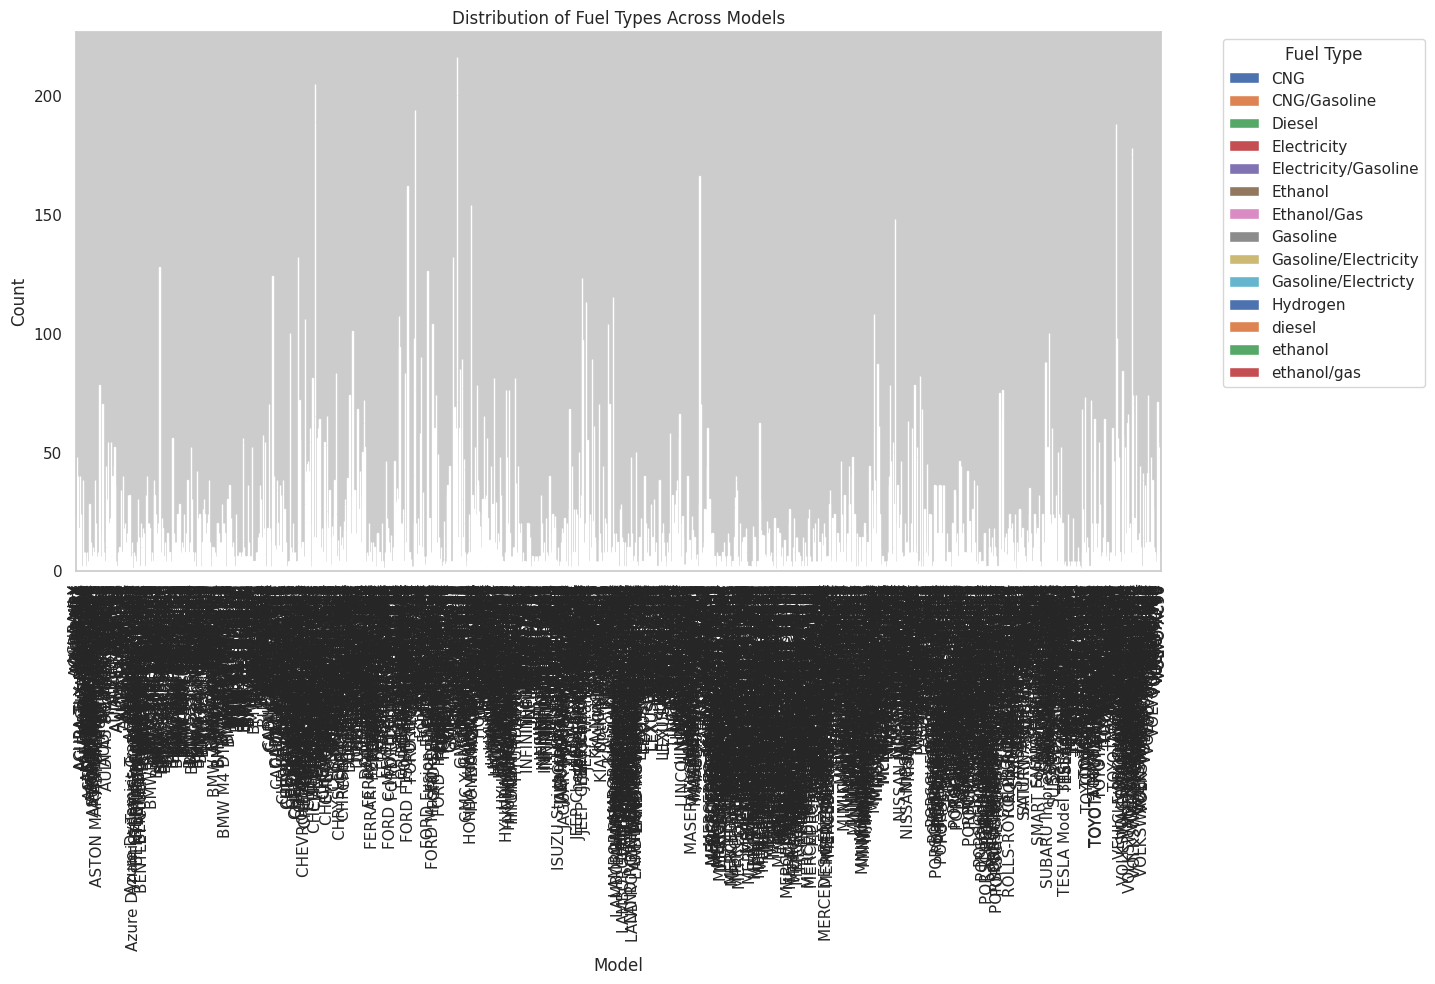

In [20]:
## unique models using different types of fuel alternatives.

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


df = pd.read_csv('/content/Newdata.csv')
df.head()

#combining all the model columns across the dataset to find unique models
model_columns = [col for col in df.columns if 'Model' in col]
combined_models = pd.concat([df[col] for col in model_columns], axis=0)

unique_models = combined_models.unique()

# Remove NaN values
combined_models = combined_models.dropna()

# Find unique entries
unique_models = combined_models.unique()

# Display the unique entries
print("Unique models throughout the dataset (excluding NaN values):")
print(unique_models)

#combining all the fuel columns across the dataset to find unique models
fuel_columns = [col for col in df.columns if 'Fuel' in col]
combined_fuel = pd.concat([df[col] for col in fuel_columns], axis=0)

combined_fuel = combined_fuel.dropna()
unique_fuel = combined_fuel.unique()
print("Unique fuel throughout the dataset (excluding NaN values):")
print(unique_fuel)


# Combine 'Model' and 'Fuel' columns into a single DataFrame
combined_data = pd.concat([df[model_col].rename('Model').to_frame().join(df[fuel_col].rename('Fuel')) for model_col, fuel_col in zip(model_columns, fuel_columns)], axis=0)

combined_data.dropna(inplace=True)

combined_data.head()

# Group by 'Model' and get the unique fuel types for each model
model_fuel_mapping = combined_data.groupby('Model')['Fuel'].unique()

# Group by 'Model' and 'Fuel' and count occurrences
model_fuel_counts = combined_data.groupby(['Model', 'Fuel']).size().reset_index(name='Counts')

# Display the grouped data
model_fuel_counts.head()


# Pivot the data for stacked bar chart
pivot_data = model_fuel_counts.pivot(index='Model', columns='Fuel', values='Counts').fillna(0)

# Plot stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Distribution of Fuel Types Across Models')
plt.xlabel('Model')
plt.ylabel('Count')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()






